In [6]:
#Uncomment to download the test functions from CEC'17 
#!git clone https://github.com/tilleyd/cec2017-py.git

In [1]:
#Functions to handle with relative imports
import sys
sys.path.insert(1, './cec2017-py')
sys.path.insert(1, '../DifferentialEvolution')

In [5]:
#Imports of class and functions
from cec2017 import functions
from DifferentialEvolution_Clustering import DifferentialEvolution_Clustering
from DifferentialEvolution import DifferentialEvolution
from PlottingFunctions import PlottingSnapshots

In [7]:
#Example function
def exampleObjectiveFunction(X):
    import numpy as np
    return np.sum(X**2)

In [8]:
#Function to create a random individual
def individual(lower_bound,upper_bound,dimension):
    def individual_inner():
        from numpy import random , reshape
        individual = random.default_rng().uniform(lower_bound,upper_bound,dimension)
        return individual
    return individual_inner

In [11]:
# Dimensiones = 2, 10, 20, 30, 50 or 100
# Domain [-100,100]**Dimension
from sklearn import cluster

objectiveFunction = exampleObjectiveFunction
lower , upper = -10 , 10
dimension = 2
clusteringAlgorithm = cluster.dbscan

DiffEvol_Clust = DifferentialEvolution_Clustering(objectiveFunction,individual(lower,upper,dimension),clusteringAlgorithm)
DiffEvol = DifferentialEvolution(objectiveFunction,individual(lower,upper,dimension))

In [12]:
iterations = 50
populationSize = 75
scalingFactor = 0.9
crossoverRate = 0.5
clusteringAlgorithm_kw = {'eps':1,'min_samples':20}

#optimalFound , snapshots = DiffEvol(iterations,populationSize,scalingFactor,crossoverRate)
optimalFound_clust , snapshots_clust = DiffEvol_Clust(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)

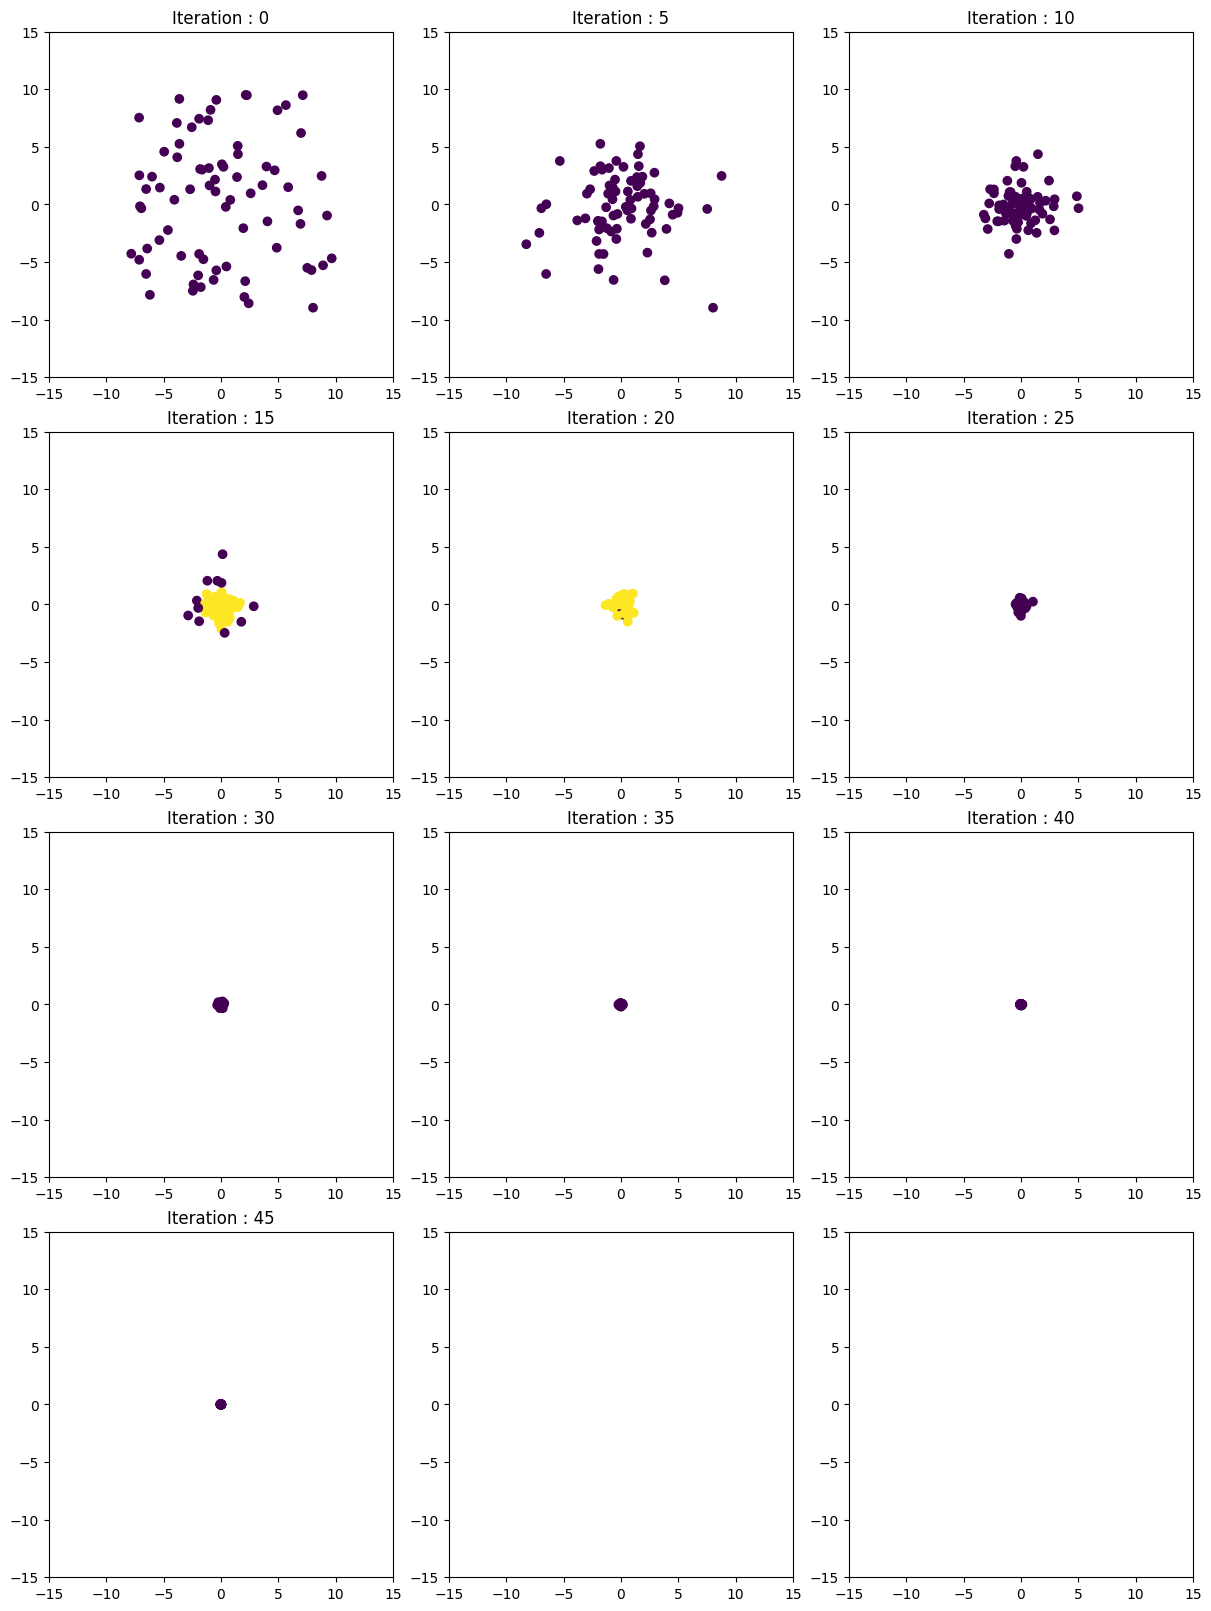

In [13]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-15,15),'ybound':(-15,15)}

PlottingSnapshots(snapshots_clust,5,SubPlot_kw)